# Test Report

In [1]:
import altair as alt
import altair_saver
import datetime
import os
import pandas as pd

import test_utils

from IPython.display import display, HTML, Markdown, SVG

alt.renderers.enable('altair_saver', fmts=['svg'])

display(Markdown(
        f"### Updated: {datetime.date.today()}"
    )
)

### Updated: 2021-05-06

In [2]:
def show_svg(image_name):
    image_path = f"../notebooks/{image_name}.svg"
    altair_saver.save(image_name, image_path)
    display(SVG(filename = image_path))
    os.remove(image_path)
    
    
def setup_county_vaccination_doses_chart(df, county_name):
    brand_dict = {
        "cumulative_total_doses": "All", 
        "cumulative_pfizer_doses": "Pfizer", 
        "cumulative_moderna_doses": "Moderna", 
        "cumulative_jj_doses": "J&J",
    }
    
    df = (df[(df.county==county_name) &
                    ((df.variable.isin(brand_dict.keys())))]
          .assign(brand=df.variable.map(brand_dict))
         )
    

    chart = (alt.Chart(df)
             .mark_line()
            .encode(
                x=alt.X("date:T", title="date", 
                       axis=alt.Axis(format="%-m/%-d/%y")),
                y=alt.Y("value:Q", title="# Doses"),
                color=alt.Color("brand:N",
                                scale=alt.Scale(
                                    domain=["All", "Pfizer", "Moderna", "J&J"],
                                    range=["black", "blue", "green", "orange"])
                               )
            ).properties(title = f"{county_name} County: Cumulative Vaccines Administered", 
                         width = 300, height = 200)
        )
        
    return chart

In [3]:
def plot_charts(vaccine_df, county_name):
    vaccine_df = vaccine_df[vaccine_df.county==county_name]
        
    vaccines_type_chart = setup_county_vaccination_doses_chart(vaccine_df, county_name)
    
    county_state_name = county_name + f", CA"
    display(Markdown(f"#### {county_state_name}"))
    
    show_svg(vaccines_type_chart)

<a id='counties_by_region'></a>

## Counties

#### Los Angeles, CA

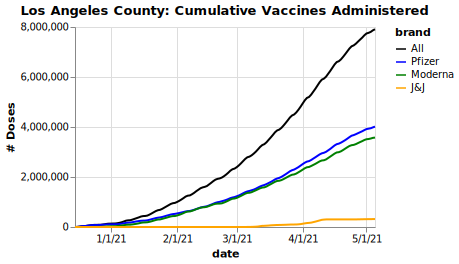

#### Orange, CA

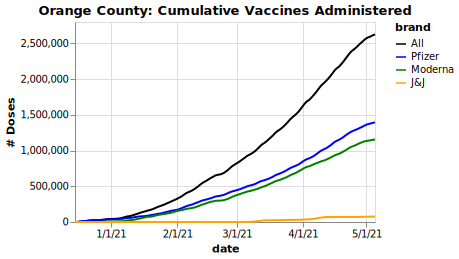

#### Riverside, CA

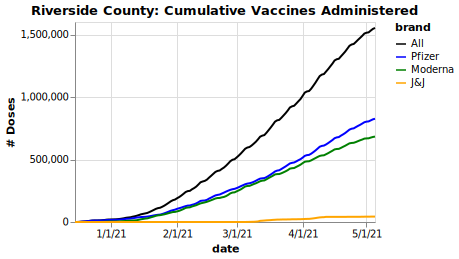

In [4]:
vaccinations = test_utils.clean_vaccines_by_county()

ca_counties = ["Los Angeles", "Orange", "Riverside"]

for c in ca_counties:
    id_anchor = c.replace(" - ", "-").replace(" ", "-")

    display(HTML(f"<a id={id_anchor}></a>"))
    plot_charts(vaccinations, c)
    display(HTML(
        "<br>"
        "<a href=#counties_by_region>Return to top</a><br>"
    ))

<a id=summary></a>